In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
print(df)

      LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0        8450            7            5          856         2         1   
1        9600            6            8         1262         2         0   
2       11250            7            5          920         2         1   
3        9550            7            5          756         1         0   
4       14260            8            5         1145         2         1   
...       ...          ...          ...          ...       ...       ...   
1455     7917            6            5          953         2         1   
1456    13175            6            6         1542         2         0   
1457     9042            7            9         1152         2         0   
1458     9717            5            6         1078         1         0   
1459     9937            5            6         1256         1         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0         

In [4]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
X = dataset[:,0:10]

In [8]:
Y = dataset[:,10]

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6959 - accuracy: 0.4912 - val_loss: 0.6930 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5068 - val_loss: 0.6867 - val_accuracy: 0.5342
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5225 - val_loss: 0.6813 - val_accuracy: 0.5479
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5607 - val_loss: 0.6764 - val_accuracy: 0.6073
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6204 - val_loss: 0.6721 - val_accuracy: 0.6393
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6761 - val_loss: 0.6679 - val_accuracy: 0.6986
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.7221 - val_loss: 0.6638 - val_accuracy: 0.7078
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8875 - val_loss: 0.3040 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8845 - val_loss: 0.3018 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8894 - val_loss: 0.3026 - val_accuracy: 0.8584
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8865 - val_loss: 0.3018 - val_accuracy: 0.8630
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8914 - val_loss: 0.3000 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8943 - val_loss: 0.2960 - val_accuracy: 0.8630
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8914 - val_loss: 0.2939 - val_accuracy: 0.8676
Epoch 

In [21]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 997us/step - loss: 0.3518 - accuracy: 0.8584


0.8584474921226501

In [22]:
import matplotlib.pyplot as plt

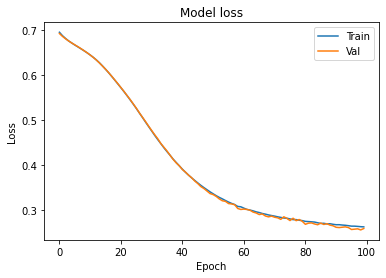

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

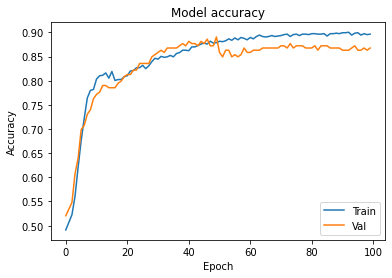

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4574 - accuracy: 0.7808 - val_loss: 0.3916 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 17ms/step - loss: 0.3344 - accuracy: 0.8669 - val_loss: 0.2950 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2979 - accuracy: 0.8845 - val_loss: 0.3465 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2843 - accuracy: 0.8914 - val_loss: 0.2538 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2518 - accuracy: 0.8992 - val_loss: 0.2291 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2697 - accuracy: 0.9002 - val_loss: 0.2272 - val_accuracy: 0.9224
Epoch 7/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2489 - accuracy: 0.9041 - val_loss: 0.3028 - val_accuracy: 0.8630
Epoch 

32/32 [==============================] - 1s 16ms/step - loss: 0.1521 - accuracy: 0.9413 - val_loss: 0.2495 - val_accuracy: 0.9087
Epoch 59/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1694 - accuracy: 0.9384 - val_loss: 0.2577 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1413 - accuracy: 0.9423 - val_loss: 0.3787 - val_accuracy: 0.8904
Epoch 61/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1521 - accuracy: 0.9354 - val_loss: 0.3726 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1620 - accuracy: 0.9374 - val_loss: 0.2936 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1638 - accuracy: 0.9315 - val_loss: 0.2710 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1463 - accuracy: 0.9403 - val_loss: 0.3423 - val_accuracy: 0.8858
Epoch 65/100

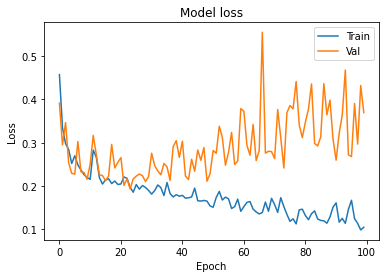

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

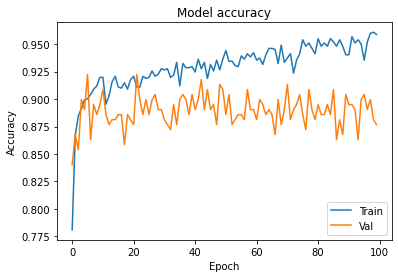

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
from keras.layers import Dropout
from keras import regularizers

In [29]:
#apply L2 regularization to a Dense layer.
#Note: Here the value 0.01 is the value of regularization parameter, i.e., lambda, which we need to optimize further.
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
   #At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections
    #0.3 AS THE PROBABILITY OF DROPPING
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 41ms/step - loss: 14.2240 - accuracy: 0.6213 - val_loss: 3.8844 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 1s 31ms/step - loss: 1.6609 - accuracy: 0.8327 - val_loss: 0.6429 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5518 - accuracy: 0.8748 - val_loss: 0.4746 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4930 - accuracy: 0.8855 - val_loss: 0.4502 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4985 - accuracy: 0.8728 - val_loss: 0.4731 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4762 - accuracy: 0.8718 - val_loss: 0.4675 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4659 - accuracy: 0.8787 - val_loss: 0.4510 - val_accuracy: 0.8995
Epoch

32/32 [==============================] - 1s 29ms/step - loss: 0.4226 - accuracy: 0.8806 - val_loss: 0.3944 - val_accuracy: 0.8858
Epoch 59/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4243 - accuracy: 0.8836 - val_loss: 0.3919 - val_accuracy: 0.8995
Epoch 60/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4319 - accuracy: 0.8826 - val_loss: 0.4156 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4333 - accuracy: 0.8924 - val_loss: 0.3904 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4387 - accuracy: 0.8836 - val_loss: 0.4167 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4477 - accuracy: 0.8777 - val_loss: 0.3893 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4304 - accuracy: 0.8836 - val_loss: 0.4034 - val_accuracy: 0.9087
Epoch 65/100

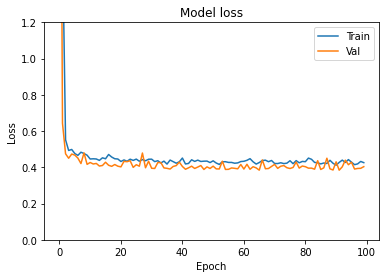

In [31]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

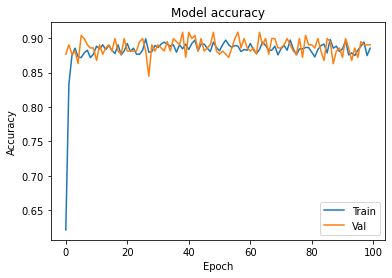

In [32]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()